# **PROJECT NAME: LOAN DATASET ANALYSIS**

### **BATCH CODE:** ANP-C8220

### **Project Partner:** Mansi Sathe and Gayatri Salve

### **Trainer:** Rajshri Thete

#### **TOOLS AND TECHNOLOGIES:**

#### **Programming Language:** Python

#### **Libraries:** Numpy,Pandas,Matplotlib,Seaborn,Scipy

#### **IDE:** Jupyter Notebook

#### **Source of Data:** https://www.kaggle.com/datasets/prakashraushan/loan-dataset

## **OBJECTIVE:**

### -Access credit risk: Identify Risk associated with loan default

### -Understanding customer behaviour

### -Optimize loan interest

### -Enhance customer experience 

### -Achieving better risk management

## **DATASET DESCRIPTION:** 

### *This dataset contains information about customer loans, including customer demographics, loan details, and default status. The dataset can be used for various data analysis such as predicting loan default risk. The dataset consists of the following columns:*

### **-customer_id:** Unique identifier for each customer
                               
### **-customer_age:** Age of the customer

### **-customer_income:** Annual income of the customer 

### **-home_ownership:** Home ownership status (e.g., RENT, OWN, MORTGAGE)

### **-employment_duration:** Duration of employment in years

### **-loan_intent:** Purpose of the loan (e.g., PERSONAL, EDUCATION, MEDICAL, VENTURE)

### **-loan_grade:** Grade assigned to the loan

### **-loan_amnt:** Loan amount requested

### **-loan_int_rate:** Interest rate of the loan 

### **-term_years:** Loan term in years 

### **-historical_default:** Indicates if the customer has a history of default (Y/N) 

### **-cred_hist_length:** Length of the customer credit history in years 

### **-Current_loan_status:** Current status of the loan (DEFAULT, NO DEFAULT)

### **Importing Libraries**

In [2]:
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Visualisation
from scipy import stats # a module from the SciPy library, which provides functions for statistical analysis.
import numpy as np #Using for numerical calculation
import seaborn as sns #it simplifies the process of creating complex plot

### **Loading Data**

In [3]:
# Function to read the CSV file from the File path.
data = pd.read_csv('D:/loan dataset project/LoanDataset.csv') # Function to read the CSV file from the File path.
print(data)

       customer_id  customer_age customer_income home_ownership  \
0              1.0            22           59000           RENT   
1              2.0            21            9600            OWN   
2              3.0            25            9600       MORTGAGE   
3              4.0            23           65500           RENT   
4              5.0            24           54400           RENT   
...            ...           ...             ...            ...   
32581      32577.0            57           53000       MORTGAGE   
32582      32578.0            54          120000       MORTGAGE   
32583      32579.0            65           76000           RENT   
32584      32580.0            56          150000       MORTGAGE   
32585      32581.0            99           42000           RENT   

       employment_duration      loan_intent loan_grade   loan_amnt  \
0                     12.0         PERSONAL          C  £35,000.00   
1                      5.0        EDUCATION          A 

In [4]:
# Prints the first 5 rows of the dataset
data.head() 

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,12.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


In [5]:
# To print the column names present in the dataset.
data.columns

Index(['customer_id', 'customer_age', 'customer_income', 'home_ownership',
       'employment_duration', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'term_years', 'historical_default', 'cred_hist_length',
       'Current_loan_status'],
      dtype='object')

In [6]:
# Prints the shape i.e. the row size by column size of the dataset
data.shape

(32586, 13)

In [7]:
# Gives the details on the datatype present in each column
data.dtypes

customer_id            float64
customer_age             int64
customer_income         object
home_ownership          object
employment_duration    float64
loan_intent             object
loan_grade              object
loan_amnt               object
loan_int_rate          float64
term_years               int64
historical_default      object
cred_hist_length         int64
Current_loan_status     object
dtype: object

In [8]:
# Gives the overall info of the dataframe object
data.describe()

,customer_id,customer_age,employment_duration,loan_int_rate,term_years,cred_hist_length
count,32583.000000,32586.000000,31691.000000,29470.000000,32586.000000,32586.000000
mean,16289.497806,27.732769,4.786659,11.011553,4.761738,5.804026
std,9405.919628,6.360528,4.089379,3.240440,2.471107,4.055078
min,1.000000,3.000000,0.000000,5.420000,1.000000,2.000000
25%,8144.500000,23.000000,2.000000,7.900000,3.000000,3.000000
50%,16288.000000,26.000000,4.000000,10.990000,4.000000,4.000000
75%,24433.500000,30.000000,7.000000,13.470000,7.000000,8.000000
max,32581.000000,144.000000,123.000000,23.220000,10.000000,30.000000


In [8]:
# Shows the number of rows in a particular column. Useful for finding missing values.
data.count()

customer_id            32583
customer_age           32586
customer_income        32586
home_ownership         32586
employment_duration    31691
loan_intent            32586
loan_grade             32586
loan_amnt              32585
loan_int_rate          29470
term_years             32586
historical_default     11849
cred_hist_length       32586
Current_loan_status    32582
dtype: int64

### **Data Cleaning**

In [9]:
#Replace the values in historical_default column with Yes and No. 
data['historical_default'] = data['historical_default'].replace({'Y': 'Yes', 'N': 'No'})

In [10]:
# Replace 'HOMEIMPROVEMENT' with 'HOME IMPROVEMENT' and 'DEBTCONSOLIDATION' with 'DEBT CONSOLIDATION'
data['loan_intent'] = data['loan_intent'].replace({
    'HOMEIMPROVEMENT': 'HOME IMPROVEMENT',
    'DEBTCONSOLIDATION': 'DEBT CONSOLIDATION'
})

In [12]:
# Print the number of missing values in each column
missing_values = data.isna().sum()
print(missing_values)

customer_id                3
customer_age               0
customer_income            0
home_ownership             0
employment_duration      895
loan_intent                0
loan_grade                 0
loan_amnt                  1
loan_int_rate           3116
term_years                 0
historical_default     20737
cred_hist_length           0
Current_loan_status        4
dtype: int64


In [12]:
#missing values in the loan_int_rate column Filling with Median
# By filling missing values with the median, you are not introducing new values that might alter the distribution of the data.
data['loan_int_rate'] = data['loan_int_rate'].fillna(data['loan_int_rate'].median())
#check missing values
missing_values = data.isna().sum()
print(missing_values)

customer_id                3
customer_age               0
customer_income            0
home_ownership             0
employment_duration      895
loan_intent                0
loan_grade                 0
loan_amnt                  1
loan_int_rate              0
term_years                 0
historical_default     20737
cred_hist_length           0
Current_loan_status        4
dtype: int64


In [13]:
#missing values in the historical_default Fill with the most frequent value
#Filling missing values with the mode preserves the distribution of the data
most_frequent_value = data['historical_default'].mode()[0]
data.fillna({ 'historical_default': most_frequent_value }, inplace=True)
#check missing values
missing_values = data.isna().sum()
print(missing_values)

customer_id              3
customer_age             0
customer_income          0
home_ownership           0
employment_duration    895
loan_intent              0
loan_grade               0
loan_amnt                1
loan_int_rate            0
term_years               0
historical_default       0
cred_hist_length         0
Current_loan_status      4
dtype: int64


In [14]:
# Calculate the median of the employment_duration column
#using the median to fill missing values, you can ensure a more accurate and robust analysis, while also preserving the original distribution 
median_duration = data['employment_duration'].median()

# Replace 0 in employment_duration with median
data.loc[:, 'employment_duration'] = data['employment_duration'].replace(0, median_duration)

#To check employment_duration column 
print(data['employment_duration'].head(10))

0    12.0
1     5.0
2     1.0
3     4.0
4     8.0
5     2.0
6     8.0
7     5.0
8     8.0
9     6.0
Name: employment_duration, dtype: float64


In [15]:
#remove rows with any missing values
data.dropna(inplace=True)
#check missing values
missing_values = data.isna().sum()
print(missing_values)


customer_id            0
customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_intent            0
loan_grade             0
loan_amnt              0
loan_int_rate          0
term_years             0
historical_default     0
cred_hist_length       0
Current_loan_status    0
dtype: int64


In [16]:
# Find unique values for specific columns
unique_loan_grade = data['loan_grade'].unique()
unique_loan_intent = data['loan_intent'].unique()
unique_current_loan_status = data['Current_loan_status'].unique()
unique_home_ownership = data['home_ownership'].unique()

# Display the unique values
print("Unique values in 'loan_grade':", unique_loan_grade)
print("Unique values in 'loan_intent':", unique_loan_intent)
print("Unique values in 'Current_loan_status':", unique_current_loan_status)
print("Unique values in 'home_ownership':", unique_home_ownership)

Unique values in 'loan_grade': ['C' 'A' 'B' 'D' 'E']
Unique values in 'loan_intent': ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOME IMPROVEMENT'
 'DEBT CONSOLIDATION']
Unique values in 'Current_loan_status': ['DEFAULT' 'NO DEFAULT']
Unique values in 'home_ownership': ['RENT' 'OWN' 'MORTGAGE' 'OTHER']


In [17]:
# Convert customer_id to int
data['customer_id'] = data['customer_id'].astype(int)

# Convert employment_duration to int
data['employment_duration'] = data['employment_duration'].astype(int)

# Clean the 'loan_amnt' column by removing £ symbols and commas, then convert to float
data['loan_amnt'] = data['loan_amnt'].replace('[Â£,]', '', regex=True).astype(float)

# Clean the 'customer_income' column by removing commas, then convert to float
data['customer_income'] = data['customer_income'].replace(',', '', regex=True).astype(float)

# Drop rows where age is above 70 or below 18
data = data.loc[(data['customer_age'] >= 18) & (data['customer_age'] <= 70)]

# Drop rows where employment_duration is less than 0 and less than or equal to 80. 
data = data[(data['employment_duration'] > 0) & (data['employment_duration'] <= 80)]


In [18]:
# Drop row where the 'customer_income' is less than and equal to 50000
data = data.loc[data['customer_income'] >= 50000]


In [19]:
# Display data types to check
print(data.dtypes)
# Shows the number of rows in a particular column. Useful for finding missing values.
data.count()

customer_id              int64
customer_age             int64
customer_income        float64
home_ownership          object
employment_duration      int64
loan_intent             object
loan_grade              object
loan_amnt              float64
loan_int_rate          float64
term_years               int64
historical_default      object
cred_hist_length         int64
Current_loan_status     object
dtype: object


customer_id            18985
customer_age           18985
customer_income        18985
home_ownership         18985
employment_duration    18985
loan_intent            18985
loan_grade             18985
loan_amnt              18985
loan_int_rate          18985
term_years             18985
historical_default     18985
cred_hist_length       18985
Current_loan_status    18985
dtype: int64

In [20]:
#Save the cleaned DataFrame to CSV file
data.to_csv('cleaned_data.csv',index=False)

### **Data Visualization**

loan_grade
A    9730
B    4719
C    2751
D    1578
E     207
Name: count, dtype: int64


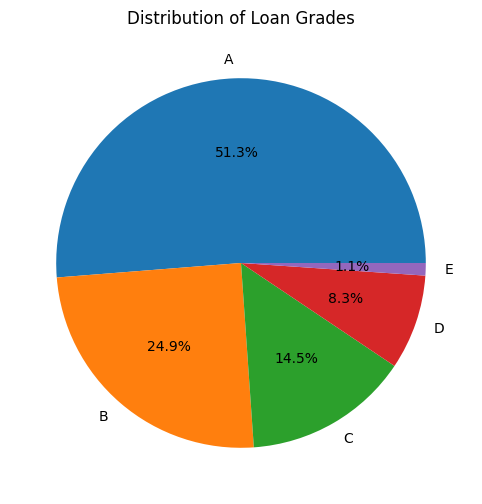

Piechart indicate that most loans in dataset are considered at low risk.


In [21]:
#1.Distribution of loan_grade 

# Calculate the frequency of each loan grade
loan_grade_freq = data['loan_grade'].value_counts()

# Print the frequency of each loan grade
print(loan_grade_freq)

# Visualize the distribution of loan grades using a pie chart
plt.figure(figsize=(8, 6))
plt.pie(loan_grade_freq, labels=loan_grade_freq.index, autopct='%1.1f%%')
plt.title('Distribution of Loan Grades')
plt.show()
print("Piechart indicate that most loans in dataset are considered at low risk.")

Current_loan_status
NO DEFAULT    16441
DEFAULT        2544
Name: count, dtype: int64


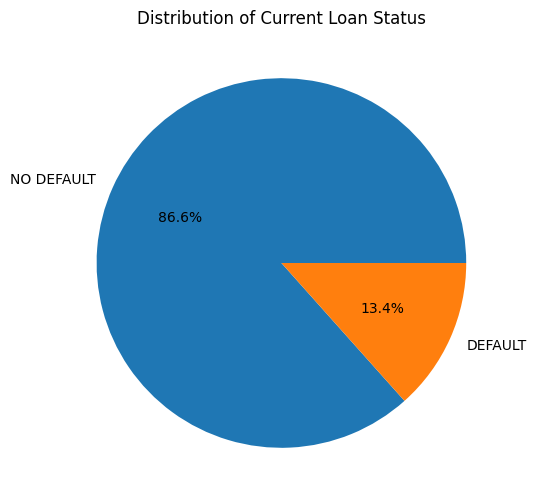

 In Piechart No Default slice is significantly larger it indicates that the majority of the loan are currently Being repaid as agreed


In [22]:
#2.distribution of Current_loan_status

# Calculate the frequency of each Current_loan_status
current_loan_status_freq = data['Current_loan_status'].value_counts()

# Print the frequency of each Current_loan_status
print(current_loan_status_freq)

# Visualize the distribution of Current_loan_status using a pie chart
plt.figure(figsize=(8, 6))
plt.pie(current_loan_status_freq, labels=current_loan_status_freq.index, autopct='%1.1f%%')
plt.title('Distribution of Current Loan Status')
plt.show()
print(" In Piechart No Default slice is significantly larger it indicates that the majority of the loan are currently Being repaid as agreed")

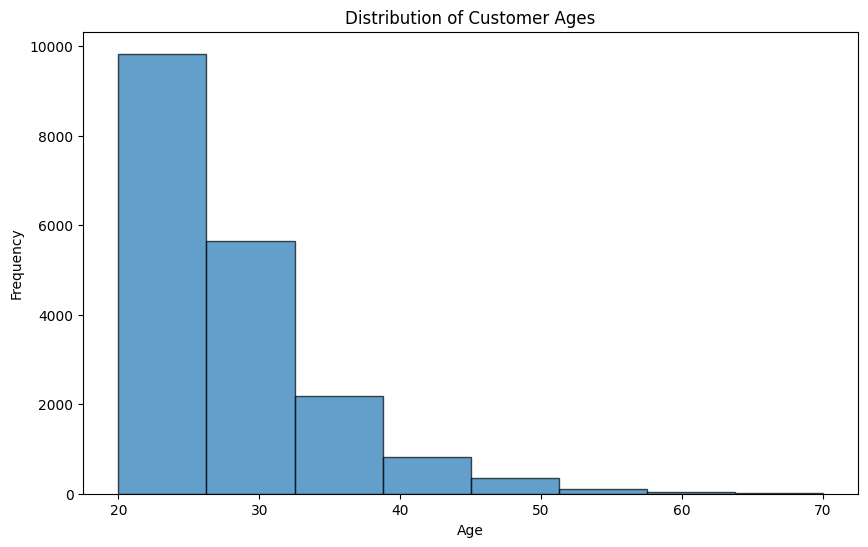

This Histogram shows Most of the customer in the data set are between the edges 20 to 26 with noticable peaks around this age group. there are fewer customer outside of this age range.


In [23]:
#3.distribution of customer ages
plt.figure(figsize=(10, 6))
plt.hist(data['customer_age'], bins=8, edgecolor='black', alpha=0.7)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
print("This Histogram shows Most of the customer in the data set are between the edges 20 to 26 with noticable peaks around this age group. there are fewer customer outside of this age range.")

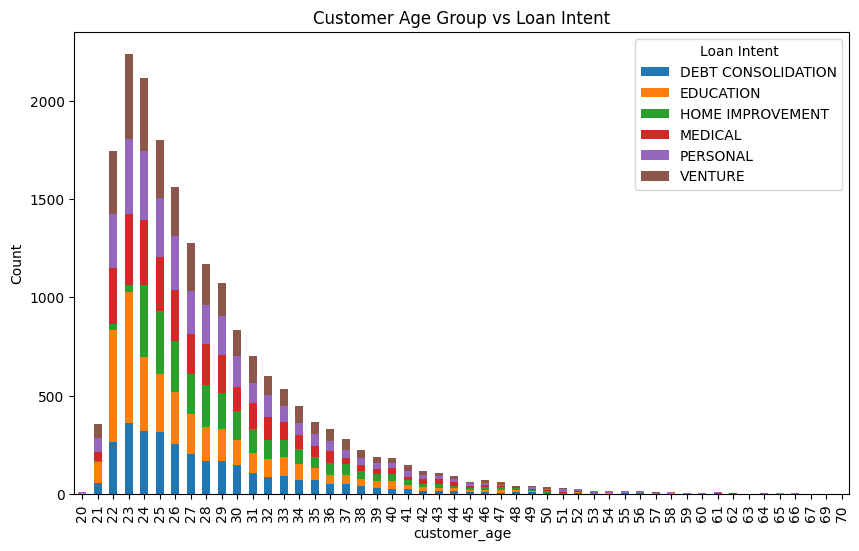

 In this stackbar chart 22-31 age group shows a high proportion of loan intent for education ,personal,venture,debt consolidation as compare to other age  group


In [33]:
# Relationship between customer age and loan intent using stack bar chart

# Aggregate data
age_intent_counts = data.groupby(['customer_age', 'loan_intent'], observed=True).size().unstack(fill_value=0)

# Plot stacked bar chart
age_intent_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Customer Age Group vs Loan Intent')
plt.xlabel('customer_age')
plt.ylabel('Count')
plt.legend(title='Loan Intent')
plt.show()
print(" In this stackbar chart 22-31 age group shows a high proportion of loan intent for education ,personal,venture,debt consolidation as compare to other age  group")

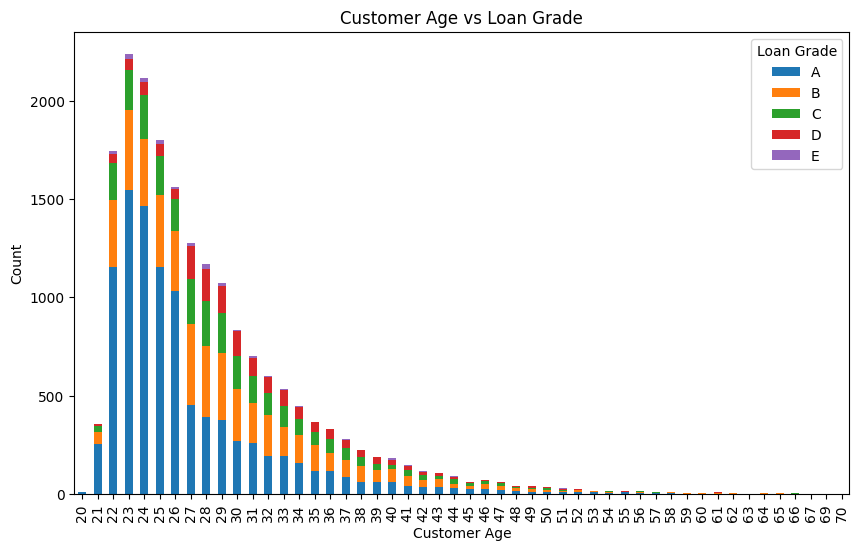

this stack bar chart shows that every bar is indicating the high proportion of loan grade A  and Extreamly  low proportion of Grade E as compared to other grades


In [25]:
# Relationship between customer age and loan grade

# Aggregate data
age_grade_counts = data.groupby(['customer_age', 'loan_grade']).size().unstack(fill_value=0)

# Plot stacked bar chart
age_grade_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Customer Age vs Loan Grade')
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.legend(title='Loan Grade')
plt.show()
print("this stack bar chart shows that every bar is indicating the high proportion of loan grade A  and Extreamly  low proportion of Grade E as compared to other grades")

<Figure size 1000x600 with 0 Axes>

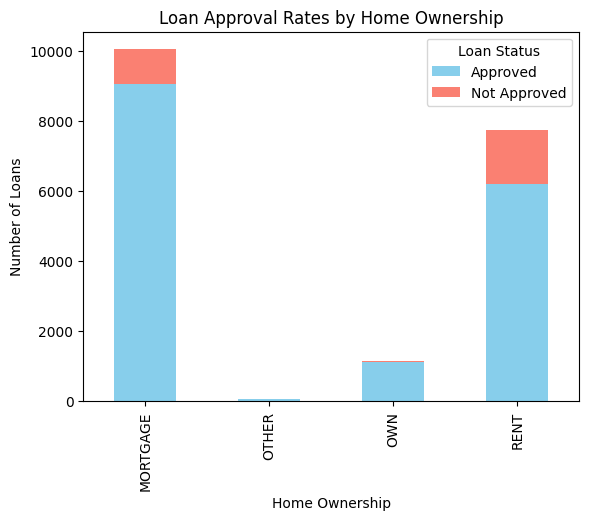

Stack bar plot shows that in every home owenership number of Loan approved amount is higher 


<Figure size 1000x600 with 0 Axes>

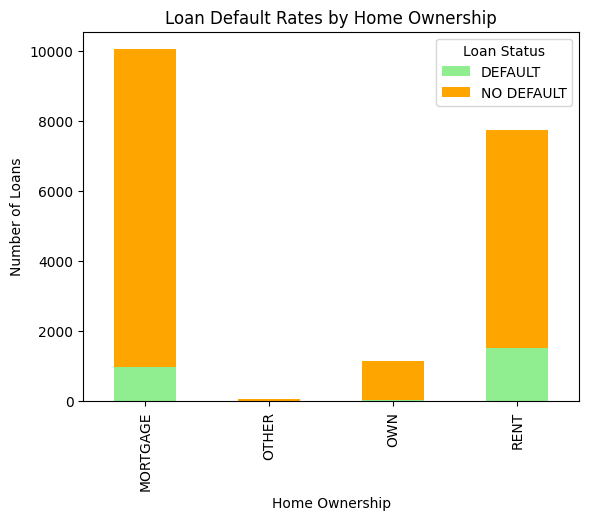

this stack bar plot shows in every home ownership no default rate is high compare to default rate 


In [26]:
#4.How does home ownership affect loan approval and default rates

# Step 1: Prepare the data
data = data.copy()  # Make sure to create a copy of the original DataFrame
data.loc[:, 'Loan_Approved'] = data['Current_loan_status'].apply(lambda x: 'Approved' if x == 'NO DEFAULT' else 'Not Approved')

# Step 2: Visualize Loan Approval Rates by Home Ownership
plt.figure(figsize=(10, 6))
loan_approval_counts = data.groupby(['home_ownership', 'Loan_Approved']).size().unstack()
loan_approval_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Loan Approval Rates by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status')
plt.show()
print("Stack bar plot shows that in every home owenership number of Loan approved amount is higher ")

# Step 3: Visualize Loan Default Rates by Home Ownership
plt.figure(figsize=(10, 6))
loan_default_counts = data.groupby(['home_ownership', 'Current_loan_status']).size().unstack()
loan_default_counts.plot(kind='bar', stacked=True, color=['lightgreen', 'orange'])
plt.title('Loan Default Rates by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status')
plt.show()
print("this stack bar plot shows in every home ownership no default rate is high compare to default rate ")

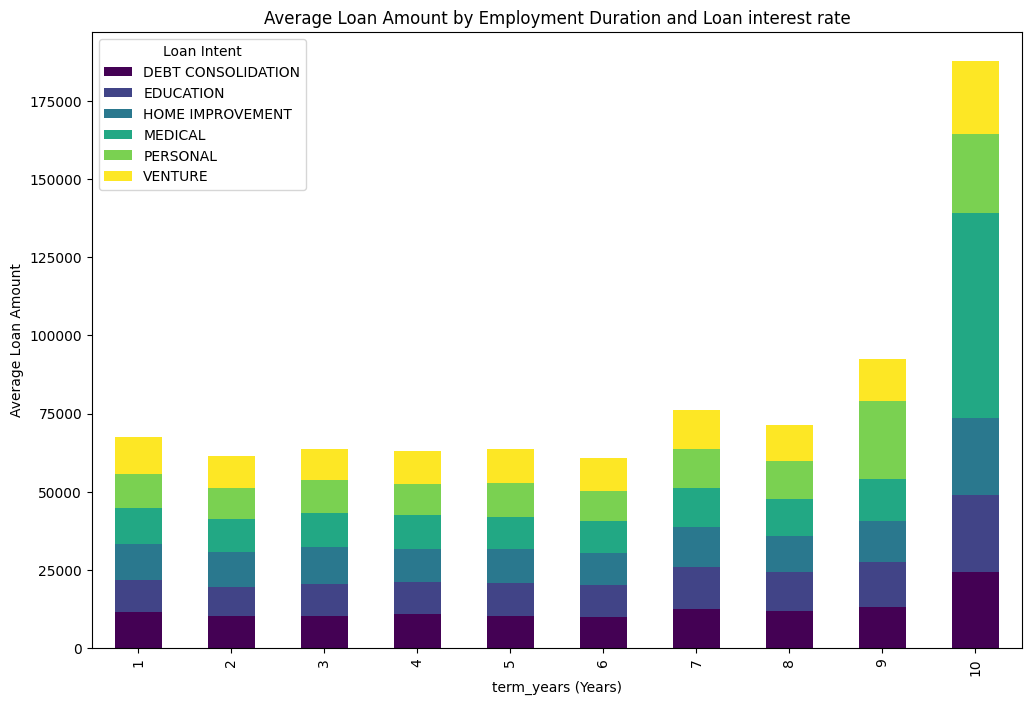

In this stack bar plot shows that moat of the customer take loan for 10 years span and mostly for medical loan as compare to other


In [27]:
#5.the relationship between employment duration and loan amount, and how does it vary by loan intent?

# Step 1: Summarize the data by employment duration and loan intent
employment_loan_summary = data.groupby(['term_years', 'loan_intent'])['loan_amnt'].mean().unstack()

# Step 2: Visualize the relationship
plt.figure(figsize=(12, 8))
employment_loan_summary.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Average Loan Amount by Employment Duration and Loan interest rate')
plt.xlabel('term_years (Years)')
plt.ylabel('Average Loan Amount')
plt.legend(title='Loan Intent')
plt.show()
print("In this stack bar plot shows that moat of the customer take loan for 10 years span and mostly for medical loan as compare to other")

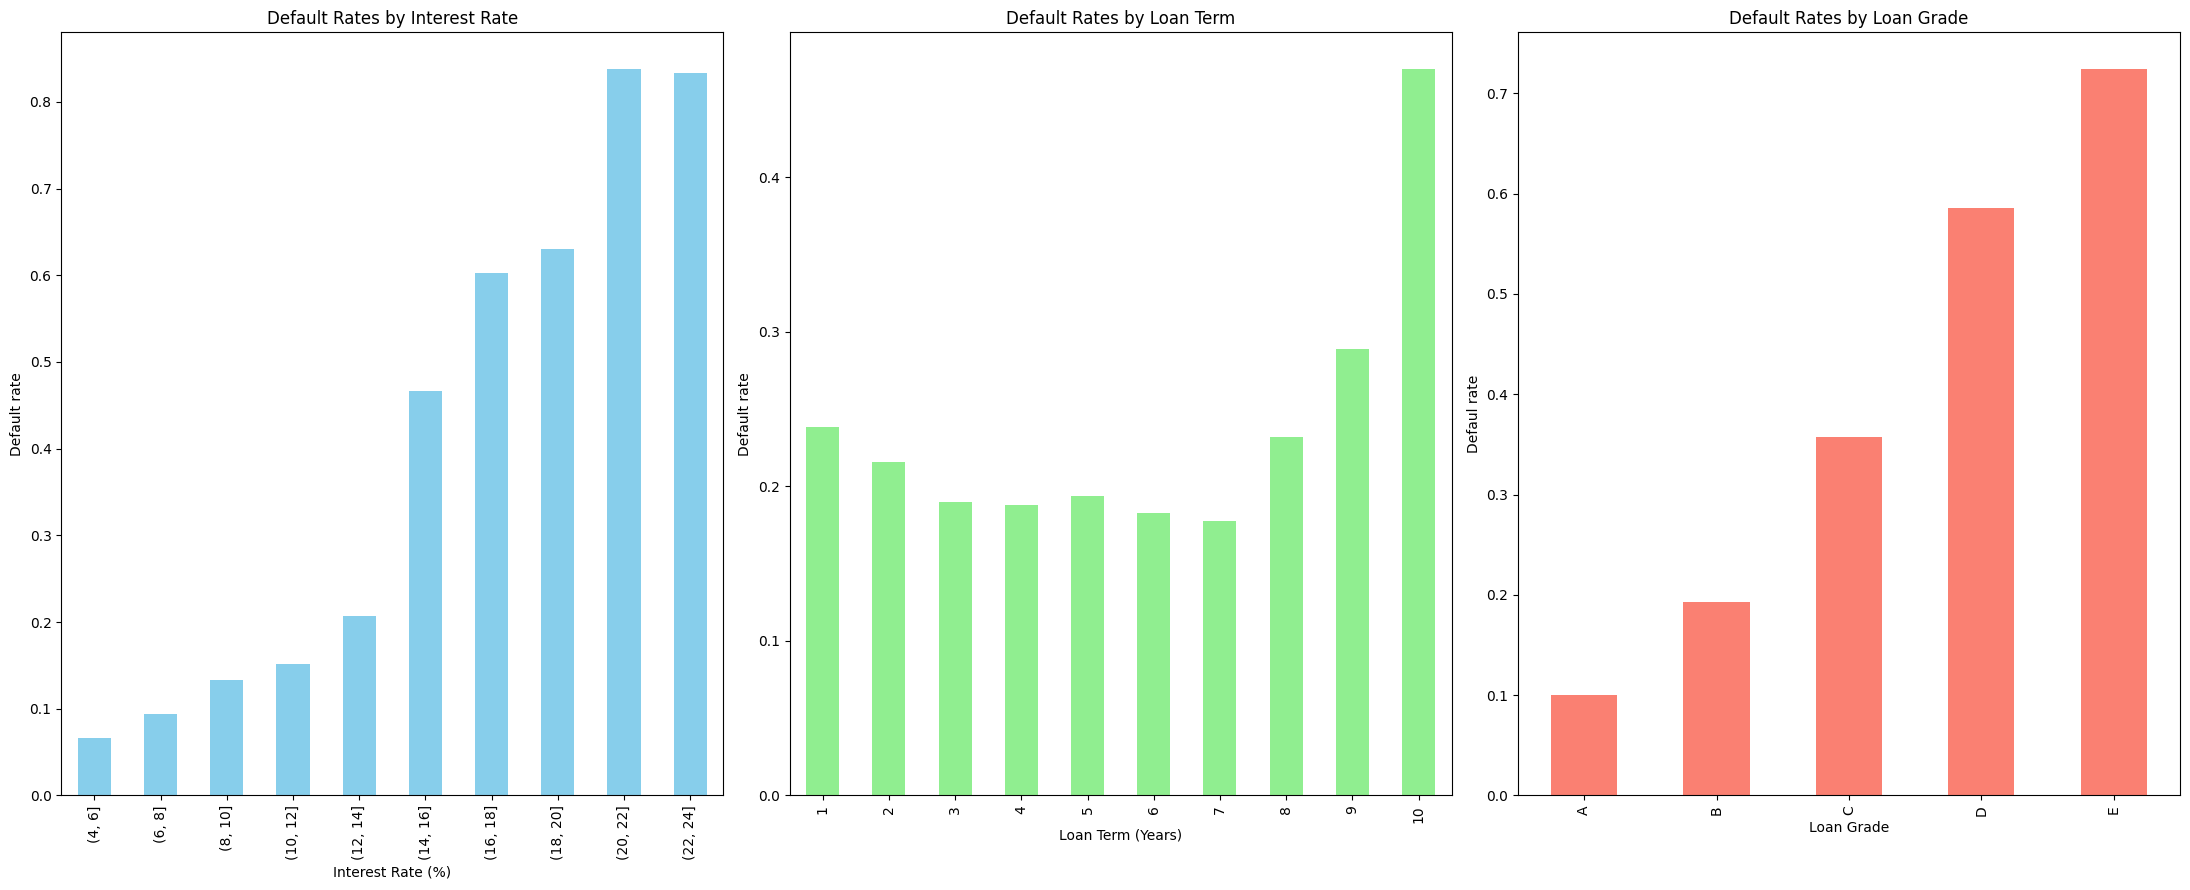

in this bar plot interest rate from 12% to 24% get increased



In [13]:
# create default_ flag column and Convert 'Current_loan_status' to binary: 1 for DEFAULT, 0 for NO DEFAULT
data['default_flag'] = data['Current_loan_status'].apply(lambda x: 1 if x == 'DEFAULT' else 0)

# Step 2: Interest Rates and Default Rates
data['int_rate_bin'] = pd.cut(data['loan_int_rate'], bins=np.arange(0, 30, 2))
# Group by interest rate range to find the default rates
interest_rate_default = data.groupby('int_rate_bin', observed=True)['default_flag'].mean()

# Step 3: Loan Terms and Default Rates
# Group by loan term to find the default rates
loan_term_default = data.groupby('term_years')['default_flag'].mean()

# Step 4: Loan Grades and Default Rates
loan_grade_default = data.groupby('loan_grade')['default_flag'].mean()
# Step 5: Visualization
plt.figure(figsize=(22, 9))

# Plot 1: Interest Rates vs. Default Rates
plt.subplot(1, 3, 1)
interest_rate_default.plot(kind='bar', color='skyblue')
plt.title('Default Rates by Interest Rate')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Default rate')


# Plot 2: Loan Term vs. Default Rates
plt.subplot(1, 3, 2)
loan_term_default.plot(kind='bar', color='lightgreen')
plt.title('Default Rates by Loan Term')
plt.xlabel('Loan Term (Years)')
plt.ylabel('Default rate')


# Plot 3: Loan Grade vs. Default Rates
plt.subplot(1, 3, 3)
loan_grade_default.plot(kind='bar', color='salmon')
plt.title('Default Rates by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Defaul rate')
plt.tight_layout()
plt.show()

print("in this bar plot interest rate from 12% to 24% get increased")
print("")

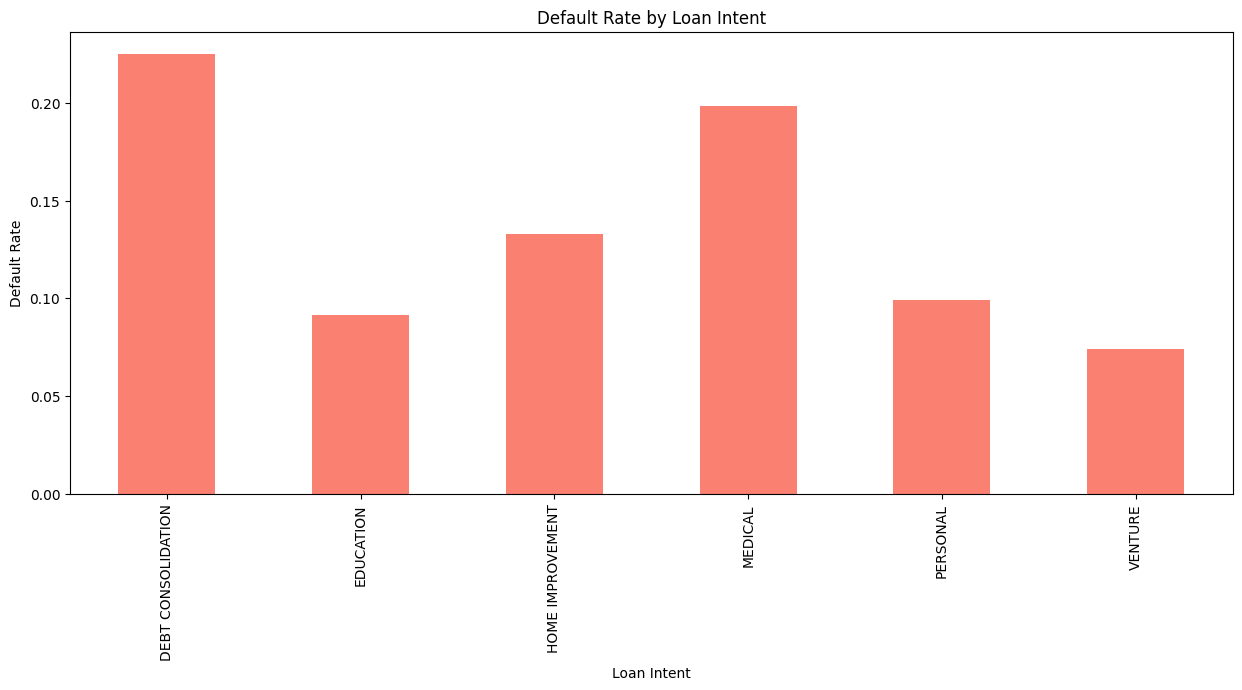

plot show that debt consolidation loan and medical loan indicates high default rate ascompare to other loan


In [29]:
# Step 4: Default Rates by Loan Intent
default_rate_by_intent = data.groupby('loan_intent')['default_flag'].mean()

#Plot: Default Rate by Loan Intent
plt.figure(figsize=(15, 6))
default_rate_by_intent.plot(kind='bar', color='salmon')
plt.title('Default Rate by Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Default Rate')
plt.show()
print("plot show that debt consolidation loan and medical loan indicates high default rate ascompare to other loan")

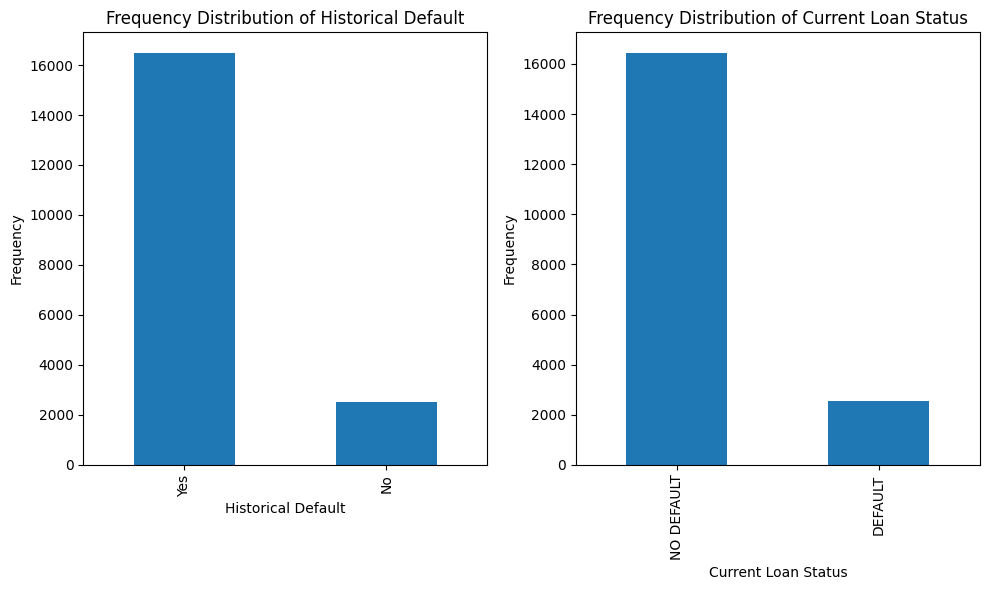

In bar plot the the most of the customer have default in there past loan but in current loan status most of the cutomer don't have the default.


In [30]:
# Bar Chart: Frequency distribution of historical_default and Current_loan_status
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
data['historical_default'].value_counts().plot(kind='bar')
plt.title('Frequency Distribution of Historical Default')
plt.xlabel('Historical Default')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
data['Current_loan_status'].value_counts().plot(kind='bar')
plt.title('Frequency Distribution of Current Loan Status')
plt.xlabel('Current Loan Status')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
print("In bar plot the the most of the customer have default in there past loan but in current loan status most of the cutomer don't have the default.")

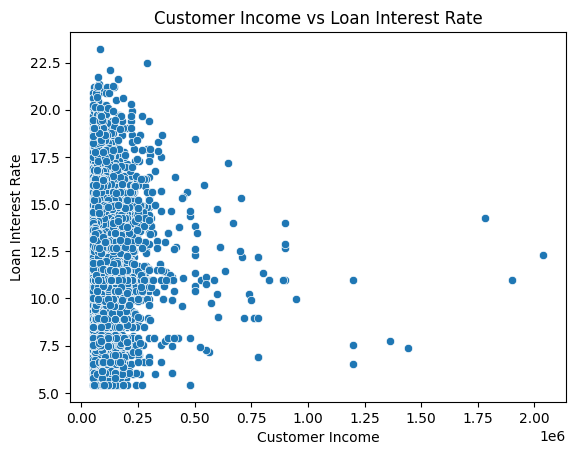

The correlation coefficient between customer income and loan interest rate is 0.02.
Correlation coefficient of 0.02: extremely weak positive correlation (almost no correlation)


In [31]:
# Plot the scatter plot of customer income vs loan interest rate
sns.scatterplot(x='customer_income', y='loan_int_rate', data=data)
plt.xlabel('Customer Income')
plt.ylabel('Loan Interest Rate')
plt.title('Customer Income vs Loan Interest Rate')
plt.show()

# Calculate the correlation coefficient
correlation_coefficient = data['customer_income'].corr(data['loan_int_rate'])
print(f"The correlation coefficient between customer income and loan interest rate is {correlation_coefficient:.2f}.")
print("Correlation coefficient of 0.02: extremely weak positive correlation (almost no correlation)")

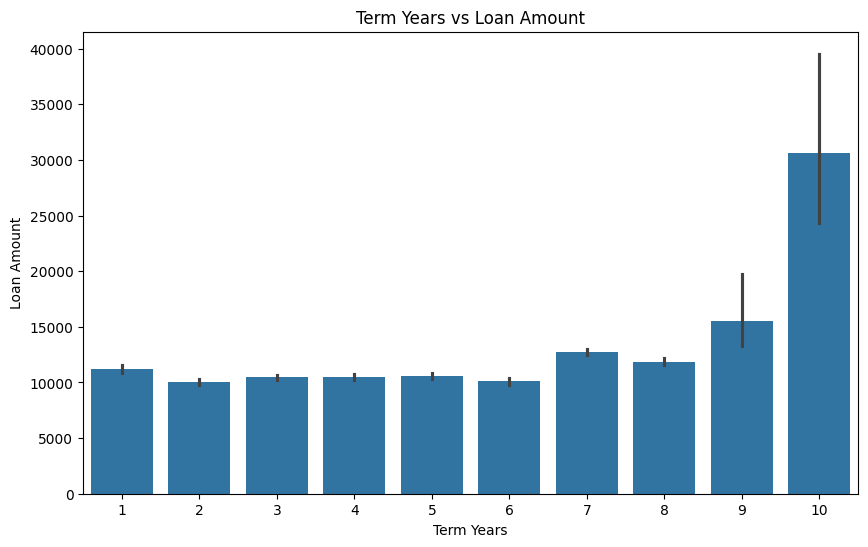

The term year 9 and 10 have the highest loan amounts.the term year 10 has highest median loan amount 35000 but term year 9 has a median loan amount 19000  which is not the highest


In [34]:
#Plot the bar plot for term years vs loan amount 
plt.figure(figsize=(10,6))
sns.barplot(x='term_years', y='loan_amnt', data=data)
plt.xlabel('Term Years')
plt.ylabel('Loan Amount')
plt.title('Term Years vs Loan Amount')
plt.show()
print("The term year 9 and 10 have the highest loan amounts.the term year 10 has highest median loan amount 35000 but term year 9 has a median loan amount 19000  which is not the highest")

### **CONCLUSION:**

#### The loan dataset reveals a relatively healthy portfolio with most borrowers making timely payments and adhering to repayment terms. Key findings include:

#### Most loans are in lower or moderate risk categories, with few high-risk loans.
#### Young adults (20-32 years old) dominate the dataset, with the 22-31 age group showing a higher proportion of loan intent across various categories.
#### The 20-34 age group has a high proportion of high-quality loans (Loan Grade A) and a low proportion of poor-quality loans (Loan Grade E).
#### Homeowners are more likely to be approved for loans and have lower default rates compared to renters and mortgage holders.
#### Customers prefer loans with a 10-year term, possibly due to lower monthly payments or more manageable financial planning.
#### Medical loans are the most common loan intent.
#### The dataset shows positive correlations between interest rates, loan term years, and loan amounts with default rates.
#### Debt Consolidation and Medical loans have higher default rates.
#### Most customers do not have a default in their current loan status, despite a majority having defaulted on past loans.
#### There is no significant relationship between a customer's income and the interest rate they are offered on their loan.
#### These insights can inform lenders and financial institutions to adjust their lending strategies, identify high-quality loan opportunities, and mitigate default risks.

####  These insights can inform lenders and financial institutions to adjust their lending strategies, identify high-quality loan opportunities, and mitigate default risks.

### **RECOMMONDATION:**

#### -Lenders should also consider implementing risk management strategies, such as credit scoring and loan-to-value ratios, to mitigate the risk of defaults.   
#### -Lenders should consider using interest rate sensitivity analysis, loan term analysis, and loan amount analysis to assess the potential impact of these factors on default rates.
#### -Lenders should consider using credit scoring status that take into account the borrower's loan purpose and financial situation to assess the risk of default.
#### -Borrowers should prioritize debt management and consider seeking advice from financial advisors to minimize their risk of default.
#### -Lenders should also consider offering financial education and credit counseling to borrowers who are seeking debt consolidation or medical loans.
#### -Lenders should consider incorporating term year into their risk assessment models to more accurately determine loan amounts and reduce the risk of defaults.